# Classification

Dependencias:
* torch
* matplotlib

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

torch.manual_seed(1)    # reproducible

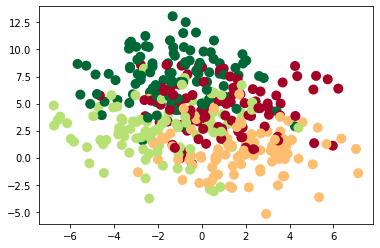

In [2]:
# Creación del dataset sintético
# cluster_std define la mezcla
n_classes = 4
x, y = make_blobs(n_samples=400, centers=n_classes, cluster_std=2.20, random_state=0)

n_samples, input_dim = x.shape

x = torch.from_numpy(x).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.LongTensor)


# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [3]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x

In [4]:
net = Net(n_feature=input_dim, n_hidden=100, n_output=n_classes)     # define the network
print(net)

optimizer = torch.optim.Adam(net.parameters())
loss_func = torch.nn.CrossEntropyLoss()

Net(
  (hidden): Linear(in_features=2, out_features=100, bias=True)
  (out): Linear(in_features=100, out_features=4, bias=True)
)


In [5]:
plt.ion()   # something about plotting

/tmp/ipykernel_11706/3173762198.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  _, prediction = torch.max(F.softmax(out), 1)


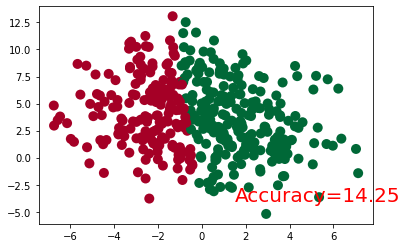

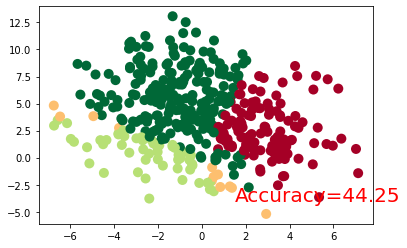

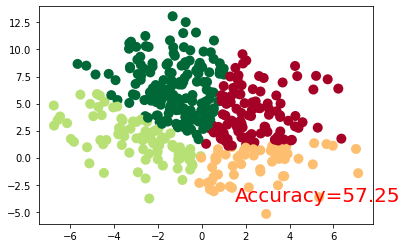

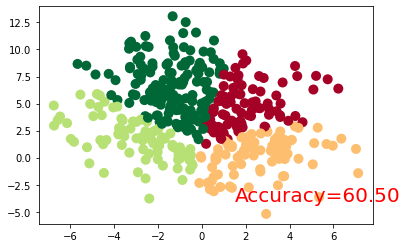

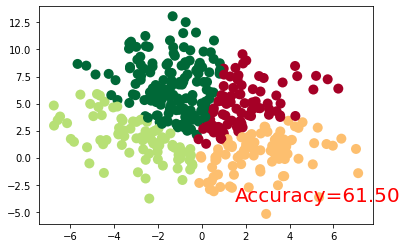

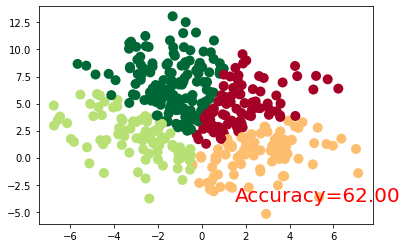

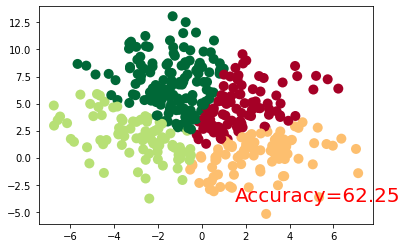

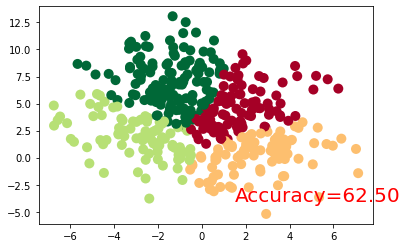

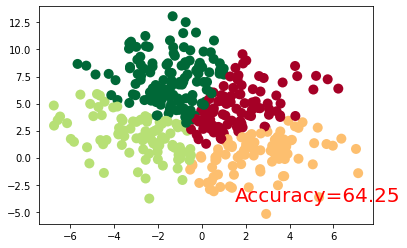

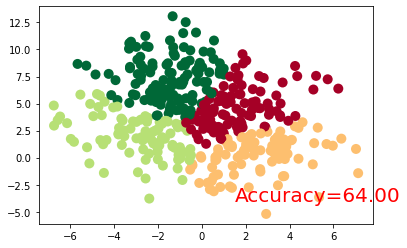

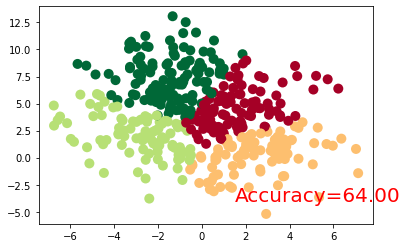

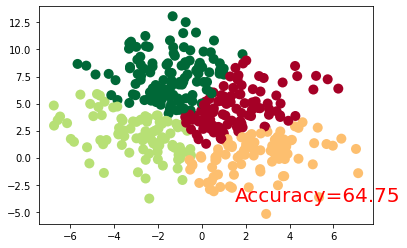

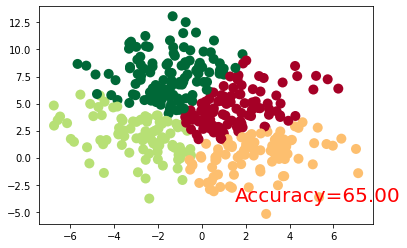

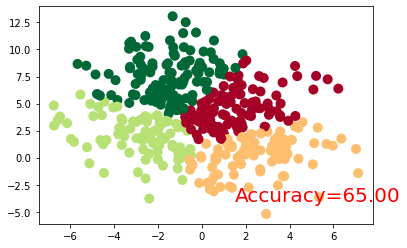

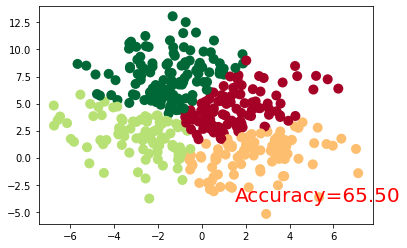

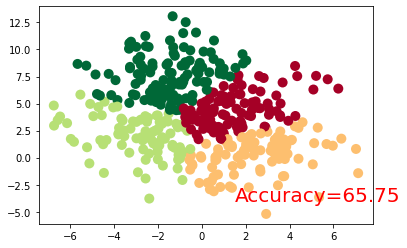

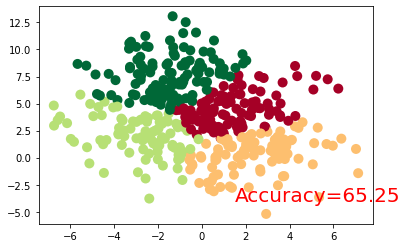

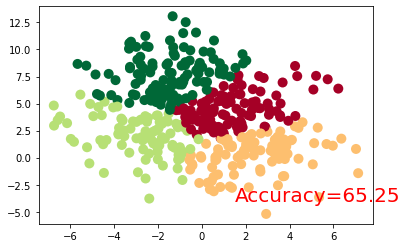

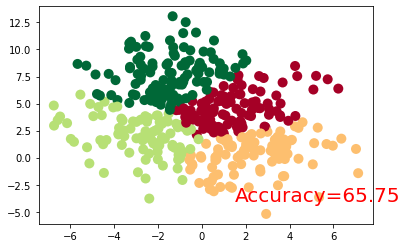

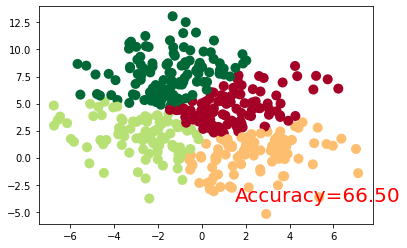

In [6]:
for t in range(200):
    out = net(x)
    loss = loss_func(out, y)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    if t % 10 == 0:
        # plot and show learning process
        plt.cla()
        _, prediction = torch.max(F.softmax(out), 1)
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/len(pred_y)*100.0
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)

plt.ioff()